<a href="https://colab.research.google.com/github/cboyda/MachineLearning/blob/main/PA3_Team1_W23_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PA3: k-NN**

Team member names:

*  Brett Adams
*  Cailenys Leslie
*  Clinton Boyda
*  Tanvir Hossain
*  Ram Dershan

Dataset: 
[New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from  sklearn import neighbors
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
# Connect to Dataset

filename = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/AB_NYC_2019.csv"

df = pd.read_csv(filename)

# we can work on merging the new dataset in the code below = Brett?

# **Feature Scaling**


In [66]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])


### 1. Check extreme values:

a. Define what an extreme value is for each feature, e.g., using boxplots.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

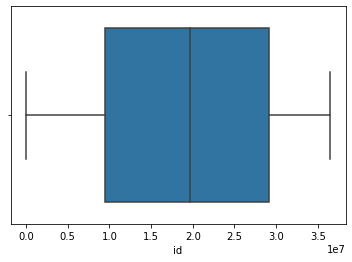

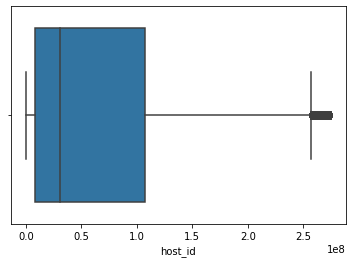

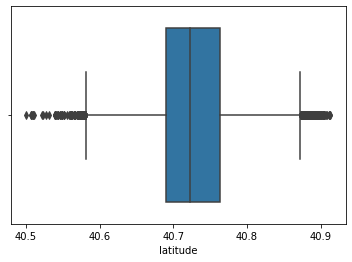

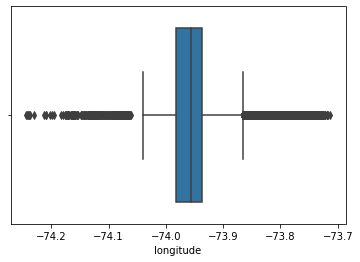

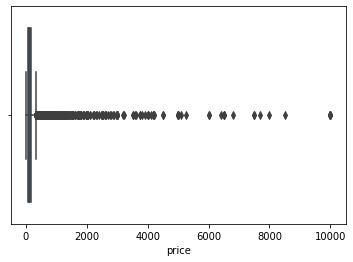

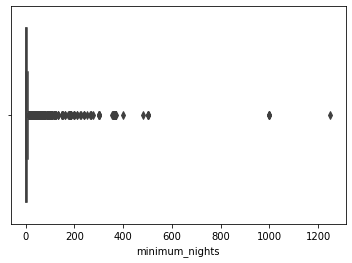

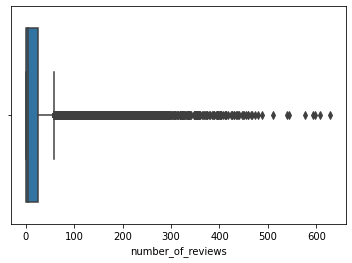

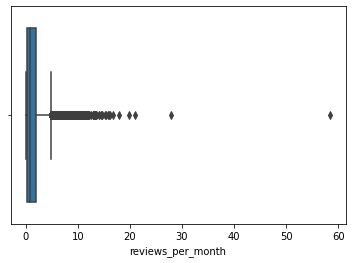

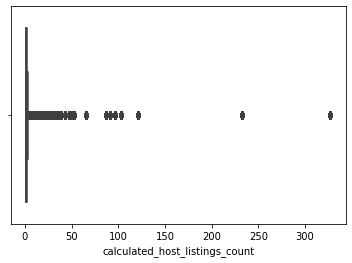

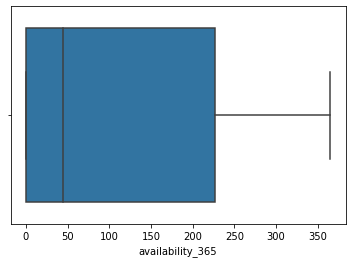

In [11]:
# create boxplots
for column in numeric_data.columns:
    plt.figure()            
    sns.boxplot(numeric_data[column])

In [68]:
# let's try looking at the histograms so the box plots are easier to read
for column in numeric_data.columns:
  fig = px.histogram(df, x=column, marginal="box")
  fig.show()

In [43]:
df.describe(include='int64').loc[['std','min','max','75%']]

id       host_id        price  minimum_nights  \
std  1.098311e+07  7.861097e+07    240.15417        20.51055   
min  2.539000e+03  2.438000e+03      0.00000         1.00000   
max  3.648724e+07  2.743213e+08  10000.00000      1250.00000   
75%  2.915218e+07  1.074344e+08    175.00000         5.00000   

     number_of_reviews  calculated_host_listings_count  availability_365  
std          44.550582                       32.952519        131.622289  
min           0.000000                        1.000000          0.000000  
max         629.000000                      327.000000        365.000000  
75%          24.000000                        2.000000        227.000000

In [49]:
# how many rows in our entire data?
df.shape

(48895, 16)

In [23]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

b. Do any of your features contain extreme values? List the features & the number of extreme values for each feature.


In [27]:
# confirm standard deviatin for price is too large = needs to drop extreme values
df.describe(include='all').loc['std']

id                                 10983108.38561
name                                          NaN
host_id                           78610967.032667
host_name                                     NaN
neighbourhood_group                           NaN
neighbourhood                                 NaN
latitude                                  0.05453
longitude                                0.046157
room_type                                     NaN
price                                   240.15417
minimum_nights                           20.51055
number_of_reviews                       44.550582
last_review                                   NaN
reviews_per_month                        1.680442
calculated_host_listings_count          32.952519
availability_365                       131.622289
Name: std, dtype: object

In [52]:
# how many rows our price column?
df.price.count()

48895

In [55]:
# looking at price specifically 75% is 175 but max is 10,000 so
# what is a good 'extreme' value? boxplot shows this as 374
df.loc[df.price > 374, 'price'].count()

2335

c. Do the number of extreme values make-up a substantial portion of that feature? (e.g. 5%) Or are they so few that you could consider dropping those samples? Explain.


In [61]:
# calculate percentage of values over our extreme, if under 5% consider dropping
display ('Pricing percentage over extreme:')
(df.loc[df.price > 374, 'price'].count() / df.price.count()) * 100 

'Pricing percentage over extreme:'

4.7755394212087126

Create new df_clean set with the extreme pricing values removed.

In [69]:
df_clean = df[~df.loc[df.price > 374, 'price']].copy()

KeyError: ignored

### 2. Min-max scale your data and store this in a variable name that indicates that you’ve min-max scaled the data, e.g., X_train_minmax.

### 3. Standardize your data and store this in a variable name that indicates that you’ve standardized the data, e.g., X_train_standard.


### 4. Visual & numeric comparison 1: Choose 3 features, and compare their standard deviations of after standardizing & min-max scaling. What is the difference between these two approaches on how your features are distributed [Hint: look at the mean].


### 5. Visual & numeric comparison 2: Generate a boxplot for all three datasets, the original, the  min-max scaled, and the standardized dataset. We expect to see a comparison like the one in lab, where each box-n-whiskers plot corresponds to a different feature.


# **Exploring k-NN construction:**

### 1. Vary the n_neighbors parameter:

a. Create a k-NN classifier model querying 5 neighbors.

b. Create a k-NN classifier model querying 11 neighbors.

c. Create a k-NN classifier model querying 15 neighbors.

###2. Vary the weights parameter:

a. Create a k-NN classifier model with weights parameter set to “uniform”.

b. Create a k-NN classifier model with weights parameter set to “distance”.

# **k-NN evaluation:**

### 3. Plot the decision boundaries for each class for the different n_neighbors and weights.


### 4. Use the sklearn.metrics.accuracy_score method to compare the accuracy of the several values of k, k=5, 11, and 15, and compare your original and your normalized (min-max scaled and standardized) datasets.


### 5. Test the performance of each k-NN classifier using other evaluation metrics (precision, recall and F1 scores) and see if there is any difference if you chose different metrics.


### 6. Imagine that you have another classifier that always predicts the most common label, do a baseline comparison for your ML models.


### 7. Generate a simple plot of the test and training learning curve for each k-NN and check if you have a low/high bias or low/high variance learning. We can use the function learning_curve to generate the values that are required to plot such a learning curve (number of samples that have been used, the average scores on the training sets and the average scores on the validation sets):
